In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Simple Ways to Improve Your Matplotlib

_Kimberly Fessel, PhD_ &nbsp;  || &nbsp;  _12 August 2019_ &nbsp;  || &nbsp; [Full Blog Post](http://kimberlyfessel.com/visualizations/matplotlib-improvements/)

Begin by loading in data about [cereal nutrition facts](https://www.kaggle.com/crawford/80-cereals) to explore.

In [2]:
url = 'https://bit.ly/2JRmGC2'

df = pd.read_csv(url, na_values=-1)   #Null values in this dataset are denoted -1

In [3]:
df.shape  #77 cereals in this dataset

(77, 16)

In [4]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


Since the current calories column reflects the calories per serving, create a new column to normalize as calories per cup of cereal.

In [5]:
df.calories.head()

0     70
1    120
2     70
3     50
4    110
Name: calories, dtype: int64

In [6]:
df['calories_per_cup'] = df['calories']/df['cups']

In [7]:
df.calories_per_cup.head()  

0    212.121212
1    120.000000
2    212.121212
3    100.000000
4    146.666667
Name: calories_per_cup, dtype: float64

## Remove Spines

Matplotlib defaults include an outer box around each figure.  Adjust the axes spines to turn these off.

### Default

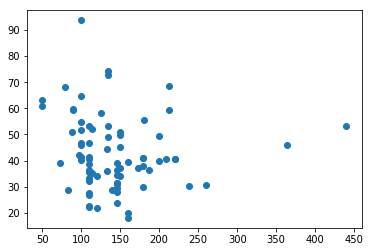

In [8]:
plt.scatter(df['calories_per_cup'], df['rating']);

### Update

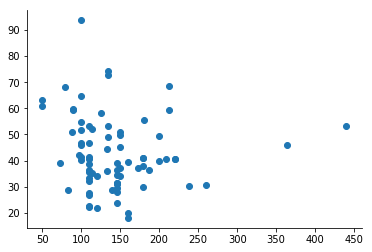

In [9]:
plt.scatter(df['calories_per_cup'], df['rating'])

#Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

#To turn off all spines, use a for loop
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

### Comparison

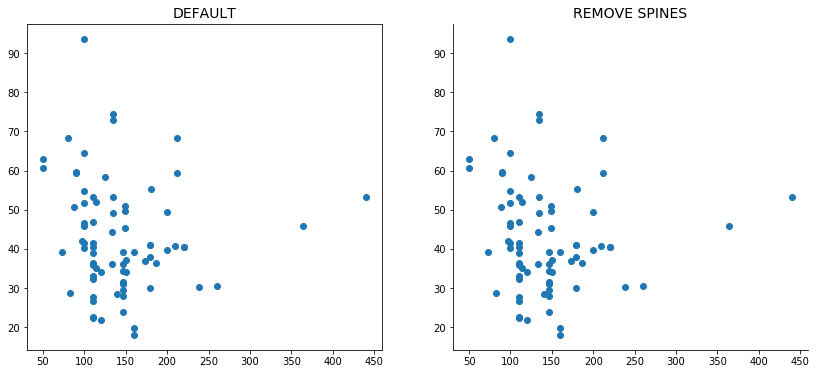

In [10]:
plt.figure(figsize=(14, 6))

#Default
plt.subplot(1, 2, 1)
plt.scatter(df['calories_per_cup'], df['rating'])
plt.title("DEFAULT", fontsize=14)

#Update
plt.subplot(1, 2, 2)
plt.scatter(df['calories_per_cup'], df['rating'])
plt.title("REMOVE SPINES", fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

## Explore Color Options

There are many ways to update Matplotlib's color defaults.  Two of my favorites are directly passing hex codes and using the xkcd color library.

### Hex Codes

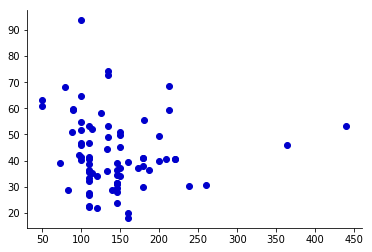

In [11]:
plt.scatter(df['calories_per_cup'], df['rating'], color='#0000CC')

#Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

### xkcd colors

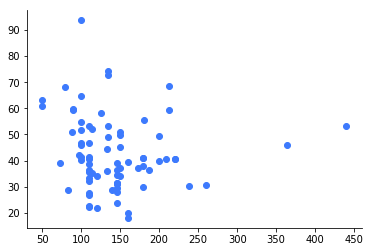

In [12]:
plt.scatter(df['calories_per_cup'], df['rating'], color='xkcd:lightish blue')

#Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

### Comparison

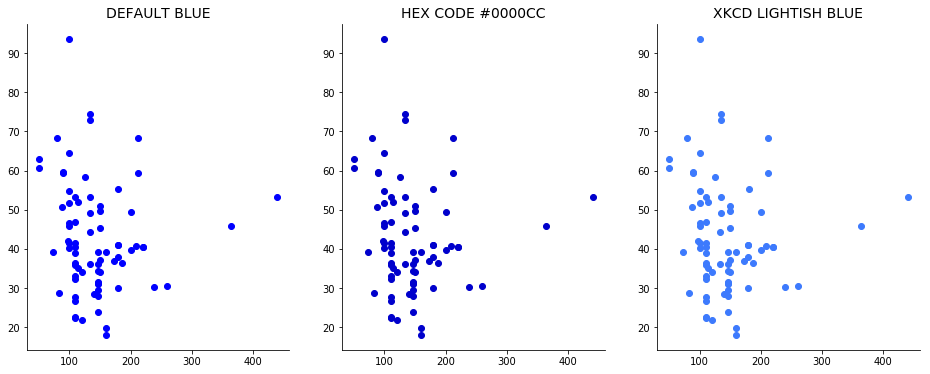

In [13]:
plt.figure(figsize=(16, 6))

#Default
plt.subplot(1, 3, 1)
plt.scatter(df['calories_per_cup'], df['rating'], color='blue')
plt.title("DEFAULT BLUE", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Update with hex code
plt.subplot(1, 3, 2)
plt.scatter(df['calories_per_cup'], df['rating'], color='#0000cc')
plt.title("HEX CODE #0000CC", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

#Update with xkcd
plt.subplot(1, 3, 3)
plt.scatter(df['calories_per_cup'], df['rating'], color='xkcd:lightish blue')
plt.title("XKCD LIGHTISH BLUE", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

## Layer Graph Objects

Matplotlib allows layering of graph objects.  To take full advantage of this, you can change an object's opacity with the `alpha` property and specify how close each layer is to the foreground with `zorder`.

### Opacity

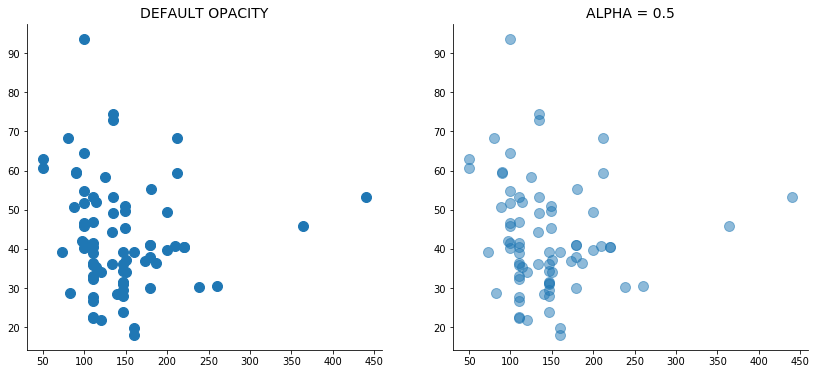

In [14]:
plt.figure(figsize=(14, 6))

#Default
plt.subplot(1, 2, 1)
plt.scatter(df['calories_per_cup'], df['rating'], s=100)
plt.title("DEFAULT OPACITY", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Reduced opacity
plt.subplot(1, 2, 2)
plt.scatter(df['calories_per_cup'], df['rating'], alpha=0.5, s=100)  
plt.title("ALPHA = 0.5", fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

### Order

First let's build a quick linear model to plot on top of the scatter points.

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np.array(df['calories_per_cup']).reshape(-1, 1), df['rating'])

m = lr.coef_[0]
b = lr.intercept_

x = np.linspace(df.calories_per_cup.min(), df.calories_per_cup.max(), 1000)
y = m*x + b

Now plot the points and the line with the line closer to the foreground (larger zorder value).

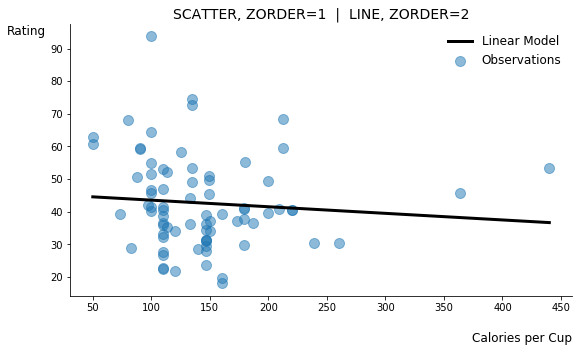

In [16]:
plt.figure(figsize=(9, 5))

#Control layer order with zorder
plt.scatter(df['calories_per_cup'], df['rating'], alpha=0.5, s=100, zorder=1)
plt.plot(x, y, lw=3, color='black', zorder=2)

plt.xlabel('\nCalories per Cup', 
           fontsize=12,
           position=(0.9, 0)
          )
plt.ylabel('Rating', 
           fontsize=12,
           rotation='horizontal',
           horizontalalignment='right',
           position=(-.1, .95)
          )
plt.title("SCATTER, ZORDER=1  |  LINE, ZORDER=2", fontsize=14)

plt.legend(['Linear Model', 'Observations'], fontsize=12, frameon=False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

## Annotate Main Points or Examples

Annotating main points or specific examples proves highly effective for data communication.  

### EDA

In [17]:
df[['name', 'rating']].sort_values('rating').head()  #Cap'n'Crunch rated lowest

,name,rating
10,Cap'n'Crunch,18.042851
12,Cinnamon Toast Crunch,19.823573
35,Honey Graham Ohs,21.871292
18,Count Chocula,22.396513
14,Cocoa Puffs,22.736446


In [18]:
df[['name', 'rating']].sort_values('rating', ascending=False).head()  #All-Bran with Extra Fiber rated highest

,name,rating
3,All-Bran with Extra Fiber,93.704912
64,Shredded Wheat 'n'Bran,74.472949
65,Shredded Wheat spoon size,72.801787
0,100% Bran,68.402973
63,Shredded Wheat,68.235885


In [19]:
df[['name', 'calories_per_cup']].sort_values('calories_per_cup', 
                                             ascending=False
                                            ).head()                  #Grape Nuts most calories per cup

,name,calories_per_cup
33,Grape-Nuts,440.000000
34,Great Grains Pecan,363.636364
51,Oatmeal Raisin Crisp,260.000000
46,Mueslix Crispy Blend,238.805970
13,Clusters,220.000000


### Annotate

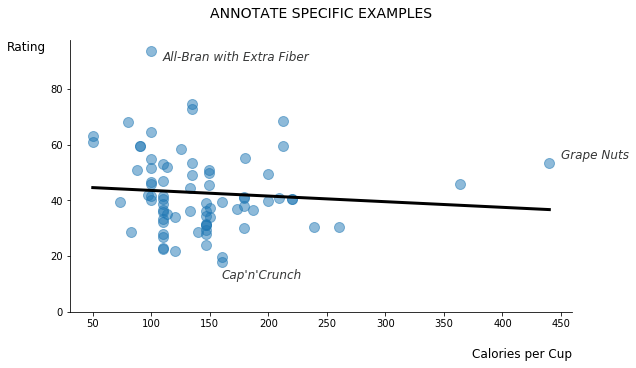

In [20]:
plt.figure(figsize=(9, 5))

plt.scatter(df['calories_per_cup'], df['rating'], alpha=0.5, s=100, zorder=1)
plt.plot(x, y, lw=3, color='black', zorder=2)

plt.xlabel('\nCalories per Cup', 
           fontsize=12,
           position=(.9, 0)
          )
plt.ylabel('Rating', 
           fontsize=12,
           rotation='horizontal',
           horizontalalignment='right',
           position=(-.1, .95)
          )
plt.title('ANNOTATE SPECIFIC EXAMPLES\n', fontsize=14)

plt.ylim(0, None)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Annotate a few cereals
plt.annotate('All-Bran with Extra Fiber', (110, 90), 
             fontsize=12,
             fontstyle='italic', 
             color='xkcd:dark grey')
plt.annotate('Grape Nuts', (450, 55), 
             fontsize=12,
             fontstyle='italic', 
             color='xkcd:dark grey')
plt.annotate("Cap'n'Crunch", (160, 12), 
             fontsize=12,
             fontstyle='italic', 
             color='xkcd:dark grey');

## Baseline and Highlight

For the next few examples, let's take a look at fat vs sugars per cup of cereal.  

In [21]:
df['sugars_per_cup'] = df.sugars/df.cups
df['fat_per_cup'] = df.fat/df.cups

### Horizontal Baseline

Adding a baseline can help set expectations allowing people understand your plots quicker.

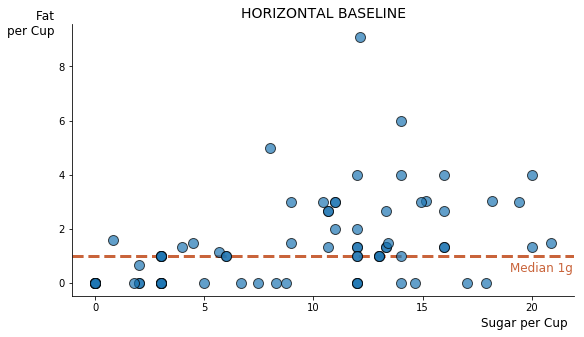

In [22]:
plt.figure(figsize=(9, 5))

plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=2, edgecolor='black')

#Horizontal Baseline
plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')

plt.xlabel('Sugar per Cup', 
           fontsize=12,
           position=(.9, .1)
          )
plt.ylabel('Fat\nper Cup', 
           fontsize=12,
           rotation='horizontal',
           horizontalalignment='right',
           position=(-.1, .95)
          )
plt.title('HORIZONTAL BASELINE', 
          fontsize=14
         )

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
  
#Annotate baseline
plt.annotate(f'Median {df.fat_per_cup.median():.0f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );

#### Comparison

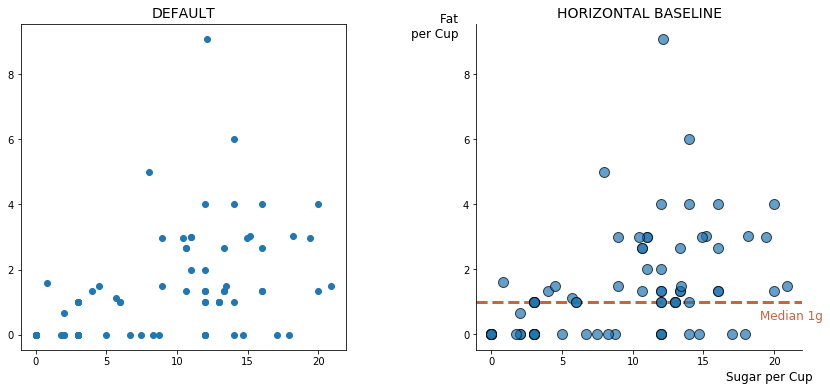

In [23]:
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace = 0.4)

#Default
plt.subplot(1, 2, 1)
plt.scatter(df['sugars_per_cup'], df['fat_per_cup'])
plt.title('DEFAULT', fontsize=14)


#Update
plt.subplot(1, 2, 2)
plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=2, edgecolor='black')

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')

plt.xlabel('Sugar per Cup', 
           fontsize=12,
           position=(.9, .1)
          )
plt.ylabel('Fat\nper Cup', 
           fontsize=12,
           rotation='horizontal',
           horizontalalignment='right',
           position=(-.1, .95)
          )
plt.title('HORIZONTAL BASELINE', 
          fontsize=14
         )

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
  
#Annotate baseline
plt.annotate(f'Median {df.fat_per_cup.median():.0f}g', 
             (19, df.fat_per_cup.median()-0.55), 
             fontsize=12,
             color='xkcd:terra cotta'
            );

### Create New Axes

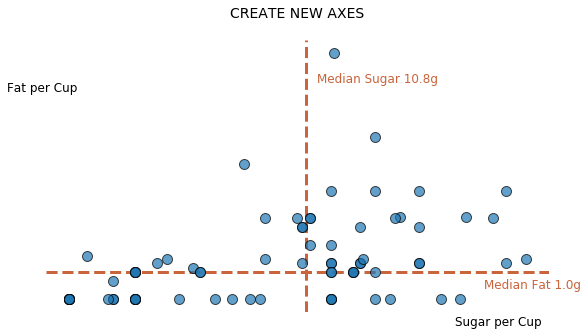

In [24]:
plt.figure(figsize=(9, 5))

plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=2, edgecolor='black')

#New axes as added lines
plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')

plt.xlabel('Sugar per Cup', 
           fontsize=12,
           position=(.9, .1)
          )
plt.ylabel('Fat per Cup', 
           fontsize=12,
           rotation='horizontal',
           horizontalalignment='center',
           position=(0, .8)
          )
plt.title('CREATE NEW AXES\n', 
          fontsize=14
         )

#Remove all spines and ticks
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
#Annotate new axes
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            );

### Rectangle

If you'd like to direct attention to one specific portion of your plot, you can add a rectangle.

In [25]:
from matplotlib.patches import Rectangle

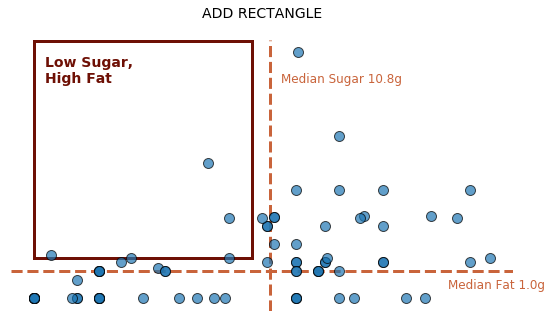

In [26]:
plt.figure(figsize=(9, 5))

plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=2, edgecolor='black')

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=1, color='xkcd:terra cotta')

plt.title('ADD RECTANGLE\n', 
          fontsize=14
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            )

#Add rectangle
plt.gca().add_patch(Rectangle((0, 1.5), 10, 8,
                     color='xkcd:reddy brown', lw=3, fill=None))

#Annotate rectangular region
plt.annotate(f'Low Sugar,\nHigh Fat', 
             (0.5, 8), 
             fontsize=14,
             fontweight='bold',
             color='xkcd:reddy brown'
            );

### Shading

Shading provides an alternate way to draw attention to a particular area.

#### Horizontal or Vertical Span

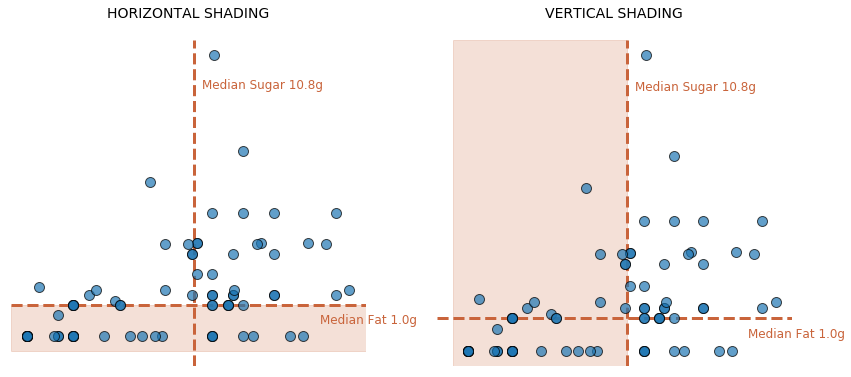

In [27]:
plt.figure(figsize=(14, 6))

#HORIZONTAL
plt.subplot(1, 2, 1)
plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=3, edgecolor='black')

#Horizontal Span Shading
plt.axhspan(-0.5, df['fat_per_cup'].median(), alpha=0.2, 
            zorder=1, color='xkcd:terra cotta')

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')

plt.title('HORIZONTAL SHADING\n', 
          fontsize=14
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            );


#VERTICAL
plt.subplot(1, 2, 2)
plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=3, edgecolor='black')

#Vertical Span Shading
plt.axvspan(-1, df['sugars_per_cup'].median(), alpha=0.2, 
            zorder=1, color='xkcd:terra cotta')

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')

plt.title('VERTICAL SHADING\n', 
          fontsize=14
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            );
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            );

#### Fill Between

If the area you'd like to highlight follows more complex logic, consider filling between two lines and applying a `where` filter.

In [28]:
sugars = np.linspace(df.sugars_per_cup.min(), df.sugars_per_cup.max(), 1000)

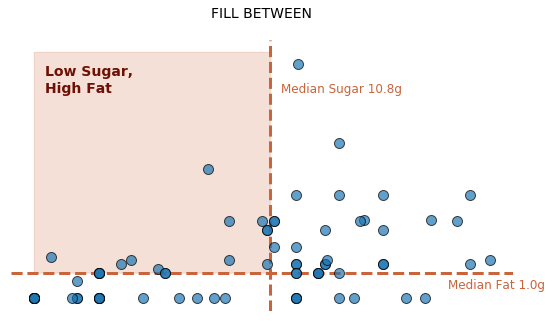

In [29]:
plt.figure(figsize=(9, 5))

plt.scatter(df['sugars_per_cup'], df['fat_per_cup'], 
            s=100, alpha=0.7, zorder=3, edgecolor='black')

#Fill Between
plt.gca().fill_between(sugars, df['fat_per_cup'].median(), df['fat_per_cup'].max()*1.05, 
                       where=sugars < df['sugars_per_cup'].median(),
                       alpha=0.2, zorder=1, color='xkcd:terra cotta'
                      )

plt.axhline(df['fat_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')
plt.axvline(df['sugars_per_cup'].median(), linestyle='--', lw=3, 
            zorder=2, color='xkcd:terra cotta')

plt.title('FILL BETWEEN\n', 
          fontsize=14
         )

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks([])
plt.yticks([])
  
plt.annotate(f'Median Fat {df.fat_per_cup.median():.1f}g', 
             (19, df.fat_per_cup.median()-0.6), 
             fontsize=12,
             color='xkcd:terra cotta'
            )
plt.annotate(f'Median Sugar {df.sugars_per_cup.median():.1f}g', 
             (df.sugars_per_cup.median()+0.5, 8), 
             fontsize=12,
             color='xkcd:terra cotta'
            )
plt.annotate(f'Low Sugar,\nHigh Fat', 
             (0.5, 8), 
             fontsize=14,
             fontweight='bold',
             color='xkcd:reddy brown'
            );